The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\Emilien\AppData\Local\Temp\ipykernel_21084\3233559282.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  results = torch.load("training_results.pth")


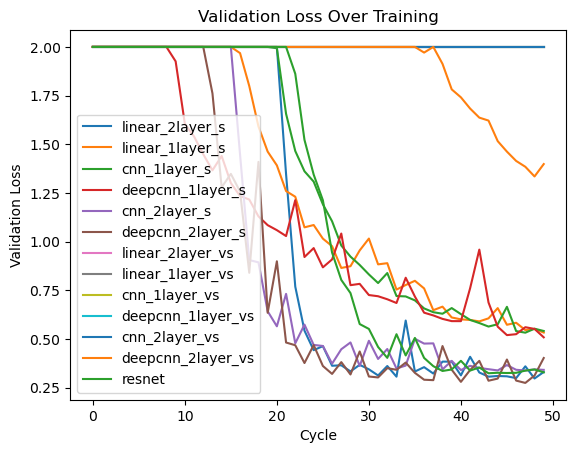

In [8]:
import torch
import matplotlib.pyplot as plt
from models import *
from helpersGeneration import *
%load_ext autoreload
%reload_ext autoreload
%autoreload 2


# Load training results
results = torch.load("training_results.pth")

# Extract data
validation_losses = results["validation_losses"]
all_labels = results["all_labels"]
model_weights = results["model_weights"]

# Example: Plot validation loss curves
for model_name, losses in validation_losses.items():
    plt.plot(np.clip(losses["val_avg"],0,2), label=model_name)

plt.xlabel("Cycle")
plt.ylabel("Validation Loss")
plt.legend()
plt.title("Validation Loss Over Training")
plt.show()


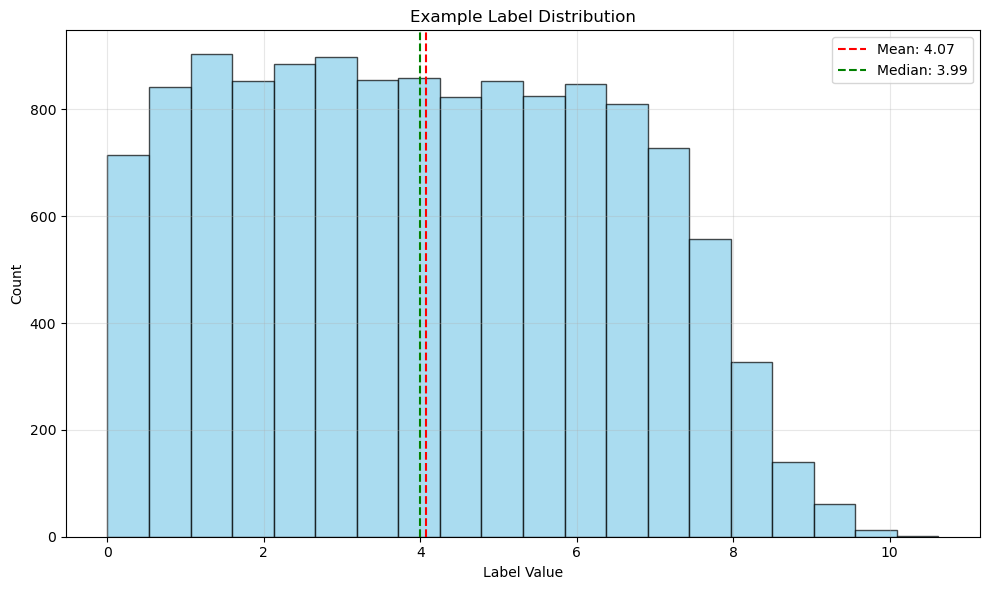

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_labels_histogram(labels_array, bins=10, title="Distribution of Labels", 
                          xlabel="Value", ylabel="Frequency", 
                          color='skyblue', edgecolor='black',
                          figsize=(10, 6), show_grid=True, 
                          show_mean=True, show_median=True):
    """
    Plot a histogram from a numpy array of labels.
    
    Parameters:
    -----------
    labels_array : numpy.ndarray
        The array of values to plot as histogram
    bins : int or sequence, default=10
        Number of bins or bin edges
    title : str, default="Distribution of Labels"
        Title of the plot
    xlabel : str, default="Value"
        Label for x-axis
    ylabel : str, default="Frequency"
        Label for y-axis
    color : str, default='skyblue'
        Color of the histogram bars
    edgecolor : str, default='black'
        Color of the histogram bar edges
    figsize : tuple, default=(10, 6)
        Figure size (width, height) in inches
    show_grid : bool, default=True
        Whether to show grid lines
    show_mean : bool, default=True
        Whether to show the mean line
    show_median : bool, default=True
        Whether to show the median line
        
    Returns:
    --------
    fig, ax : matplotlib figure and axes objects
        For further customization if needed
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot histogram
    ax.hist(labels_array, bins=bins, color=color, edgecolor=edgecolor, alpha=0.7)
    
    # Add mean line if requested
    if show_mean and len(labels_array) > 0:
        mean_value = np.mean(labels_array)
        ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=1.5, 
                  label=f'Mean: {mean_value:.2f}')
    
    # Add median line if requested
    if show_median and len(labels_array) > 0:
        median_value = np.median(labels_array)
        ax.axvline(median_value, color='green', linestyle='dashed', linewidth=1.5,
                  label=f'Median: {median_value:.2f}')
    
    # Add labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    # Add grid
    if show_grid:
        ax.grid(alpha=0.3)
    
    # Add legend if we have mean or median
    if (show_mean or show_median) and len(labels_array) > 0:
        ax.legend()
    
    plt.tight_layout()
    
    return fig, ax

# Example usage
if __name__ == "__main__":
    # Example data
    
    # Plot histogram
    fig, ax = plot_labels_histogram(
        all_labels, 
        bins=20,
        title="Example Label Distribution",
        xlabel="Label Value",
        ylabel="Count"
    )
    
    plt.show()

In [20]:
import torch

# Define model hyperparameters
patch_size = 7
embed_dim = 64
num_heads = 4
hidden_dim = 128
num_layers = 6
dropout = 0.0


single_prediction = False
use_regression_token = False

# Get all transformer models, _s stands for small, _b for big models
models = get_transformer_models(patch_size, embed_dim, num_heads, hidden_dim, num_layers, dropout,name_suffix='_s', use_regression_token= use_regression_token, single_prediction=single_prediction)

models_very_small = get_transformer_models(patch_size, embed_dim//2, num_heads//2, hidden_dim//2, num_layers//2, dropout,name_suffix='_vs', use_regression_token= use_regression_token, single_prediction=single_prediction)
models.update(models_very_small)


resnet = MultiImageLightResNet(patch_size, single_prediction=single_prediction)
models.update({"resnet": resnet})

# Load saved training results
save_path = "training_results.pth"
checkpoint = torch.load(save_path)

# Load model weights
for name, model in models.items():
    if name in checkpoint["model_weights"]:
        model.load_state_dict(checkpoint["model_weights"][name])
        model.eval()  # Set to evaluation mode
        print(f"Loaded weights for {name}")
    else:
        print(f"Warning: No saved weights found for {name}")

# Retrieve stored validation losses and labels
validation_losses = checkpoint["validation_losses"]
all_labels = checkpoint["all_labels"]

print("Loaded validation losses and labels for analysis.")




Loaded weights for linear_2layer_s
Loaded weights for linear_1layer_s
Loaded weights for cnn_1layer_s
Loaded weights for deepcnn_1layer_s
Loaded weights for cnn_2layer_s
Loaded weights for deepcnn_2layer_s
Loaded weights for linear_2layer_vs
Loaded weights for linear_1layer_vs
Loaded weights for cnn_1layer_vs
Loaded weights for deepcnn_1layer_vs
Loaded weights for cnn_2layer_vs
Loaded weights for deepcnn_2layer_vs
Loaded weights for resnet
Loaded validation losses and labels for analysis.


C:\Users\Emilien\AppData\Local\Temp\ipykernel_21084\878061052.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(save_path)


In [21]:
# Image generation parameters
nPosPerFrame = 10 
background_mean, background_sigma = 100,10
part_mean, part_sigma = 500,20
image_props={"upsampling_factor":10,
      "background_intensity": [background_mean,background_sigma],
      "particle_intensity": [part_mean,part_sigma],
      "resolution": 100e-9,
      "trajectory_unit" : 1000,
      "output_size": 7,
      "poisson_noise" : -1
        }

traj_div_factor = 100


def load_validation_data():

    trajs1 = np.load("./valTrajs/val1.npy") /traj_div_factor
    trajs3 = np.load("./valTrajs/val3.npy") /traj_div_factor
    trajs5 = np.load("./valTrajs/val5.npy") /traj_div_factor
    trajs7 = np.load("./valTrajs/val7.npy") /traj_div_factor


    vid1 = trajectories_to_video(trajs1,nPosPerFrame,center=True,image_props=image_props)
    vid1,_ = normalize_images(vid1,background_mean,background_sigma,part_mean+background_mean)

    vid3 = trajectories_to_video(trajs3,nPosPerFrame,center=True,image_props=image_props)
    vid3,_ = normalize_images(vid3,background_mean,background_sigma,part_mean+background_mean)

    vid5 = trajectories_to_video(trajs5,nPosPerFrame,center=True,image_props=image_props)
    vid5,_ = normalize_images(vid5,background_mean,background_sigma,part_mean+background_mean)

    vid7 = trajectories_to_video(trajs7,nPosPerFrame,center=True,image_props=image_props)
    vid7,_ = normalize_images(vid7,background_mean,background_sigma,part_mean+background_mean)

    return torch.Tensor(vid1),torch.Tensor(vid3), torch.Tensor(vid5), torch.Tensor(vid7)

# Load validation dataset (fixed, does not change across cycles)
val_videos = load_validation_data()  # Returns (vid1, vid3, vid5, vid7)
val_labels = torch.tensor([1, 3, 5, 7], dtype=torch.float32)  # Corresponding labels

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_model_predictions_violin(models, val_videos, val_labels, chosen_label):
    """
    Plots a violin plot of the predictions of all models for a specific validation dataset.

    Args:
    - models (dict): Dictionary of model names and instances.
    - val_videos (tuple): Tuple of validation video tensors.
    - val_labels (Tensor): Corresponding labels (torch.Tensor([1, 3, 5, 7])).
    - chosen_label (int): The validation label to visualize (must be 1, 3, 5, or 7).
    """

    # Find index of the chosen label
    if chosen_label not in val_labels.tolist():
        print(f"Error: Chosen label {chosen_label} not in available labels {val_labels.tolist()}")
        return

    label_idx = val_labels.tolist().index(chosen_label)
    chosen_video = val_videos[label_idx]  # Get corresponding video

    predictions = {}

    # Compute predictions for each model
    for name, model in models.items():
        model.eval()
        with torch.no_grad():
            preds = model(chosen_video).mean(dim=1).squeeze().tolist()  # Get all predictions for this video
            predictions[name] = preds  # Store as list

    # Prepare data for Seaborn
    data = []
    for model_name, preds in predictions.items():
        for pred in preds:
            data.append({"Model": model_name, "Prediction": pred})

    # Convert to DataFrame for easy plotting
    import pandas as pd
    df = pd.DataFrame(data)

    # Plot violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Model", y="Prediction", data=df, inner="box", palette="coolwarm")

    # Add reference line for true label
    plt.axhline(y=chosen_label, color='r', linestyle='--', label=f"True Value: {chosen_label}")

    plt.xlabel("Model")
    plt.ylabel("Predicted Value")
    plt.title(f"Distribution of Model Predictions for Validation Set {chosen_label}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()



C:\Users\Emilien\AppData\Local\Temp\ipykernel_21084\3954125471.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Model", y="Prediction", data=df, inner="box", palette="coolwarm")


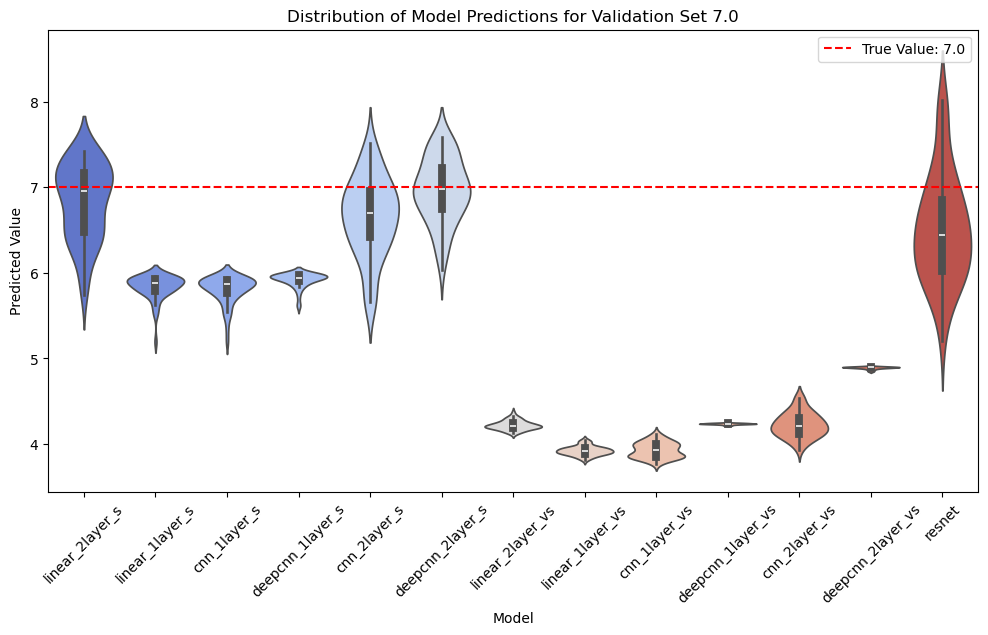

In [23]:
plot_model_predictions_violin(models, val_videos, val_labels, chosen_label=7.0)

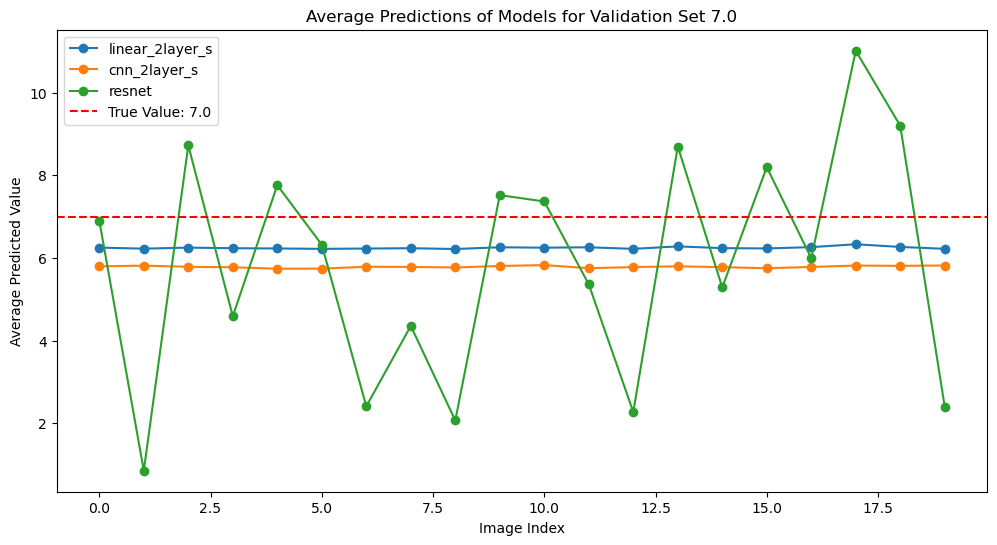

In [33]:
import matplotlib.pyplot as plt

def plot_model_predictions_average(models, val_videos, val_labels, chosen_label, sequence_idx= -1):
    """
    Plots the average predictions of all models for a specific validation dataset.

    Args:
    - models (dict): Dictionary of model names and instances.
    - val_videos (tuple): Tuple of validation video tensors.
    - val_labels (Tensor): Corresponding labels (torch.Tensor([1, 3, 5, 7])).
    - chosen_label (int): The validation label to visualize (must be 1, 3, 5, or 7).
    """

    # Find index of the chosen label
    if chosen_label not in val_labels.tolist():
        print(f"Error: Chosen label {chosen_label} not in available labels {val_labels.tolist()}")
        return

    label_idx = val_labels.tolist().index(chosen_label)
    chosen_video = val_videos[label_idx]  # Get corresponding video

    predictions = {}

    # Compute predictions for each model
    selected_models = ['linear_2layer_s', 'cnn_2layer_s', 'resnet']
    for name, model in models.items():
        if name in selected_models:
            model.eval()
            with torch.no_grad():
                preds = model(chosen_video)
                if(sequence_idx == -1):
                    preds = preds.mean(dim=0).squeeze().tolist()  # Average over batch_size
                else:
                    preds = preds[sequence_idx].squeeze().tolist()  # Average over batch_size

                predictions[name] = preds  # Store the predictions for each image

    # Plot average predictions
    plt.figure(figsize=(12, 6))
    num_images = chosen_video.shape[1]
    x_axis = list(range(num_images))

    for name, preds in predictions.items():
        plt.plot(x_axis, preds, marker='o', label=name)

    # Add reference line for true label
    plt.axhline(y=chosen_label, color='r', linestyle='--', label=f"True Value: {chosen_label}")

    plt.xlabel("Image Index")
    plt.ylabel("Average Predicted Value")
    plt.title(f"Average Predictions of Models for Validation Set {chosen_label}")
    plt.legend()
    plt.show()

# Example usage
plot_model_predictions_average(models, val_videos, val_labels, chosen_label=7.0, sequence_idx=11)